In [35]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions
from datetime import datetime

# Base de dados das ligações

In [36]:
df = pd.read_csv("https://raw.githubusercontent.com/lucasgmalheiros/projeto-simulacao-VCBC/main/calls.csv")
# Conversão do time stamp da data
df["date"] = pd.to_datetime(df.date, format="%d/%m/%Y")
df["call_started"] = pd.to_datetime(df.call_started, format="%I:%M:%S %p")
df.head()

call_id       date  daily_caller        call_started call_answered  \
0        1 2021-01-01             1 1900-01-01 08:00:00    8:00:00 AM   
1        2 2021-01-01             2 1900-01-01 08:02:42    8:02:42 AM   
2        3 2021-01-01             3 1900-01-01 08:08:24    8:08:24 AM   
3        4 2021-01-01             4 1900-01-01 08:09:37    8:09:37 AM   
4        5 2021-01-01             5 1900-01-01 08:11:10    8:11:10 AM   

   call_ended  wait_length  service_length  meets_standard  call_type  
0  8:14:22 AM            0             863            True          1  
1  8:07:31 AM            0             289            True          0  
2  8:10:13 AM            0             108            True          1  
3  8:13:45 AM            0             247            True          1  
4  8:15:28 AM            0             258            True          1

O gerente deseja que 90% das chamadas sejam atendidas em até um minuto

In [37]:
# Chamadas que aguardam mais de um minuto (60 segundos)
df.loc[df["wait_length"] > 60].head()

call_id       date  daily_caller        call_started call_answered  \
11        12 2021-01-01            12 1900-01-01 08:28:25    8:29:37 AM   
207      208 2021-01-04            62 1900-01-01 13:10:31    1:11:38 PM   
209      210 2021-01-04            64 1900-01-01 13:13:08    1:15:37 PM   
240      241 2021-01-04            95 1900-01-01 15:24:55    3:26:03 PM   
241      242 2021-01-04            96 1900-01-01 15:25:33    3:28:01 PM   

     call_ended  wait_length  service_length  meets_standard  call_type  
11   8:33:30 AM           72             232           False          1  
207  1:15:37 PM           67             238           False          1  
209  1:27:35 PM          149             718           False          1  
240  3:28:42 PM           68             159           False          2  
241  3:29:01 PM          148              60           False          1

## Análise anual

In [38]:
# Número de chamadas analisadas
n = len(df)  # 51708

# Chamadas que demoraram mais de um minuto para serem atendidas
falhas = df.loc[df["wait_length"] > 60]
qtd_falhas = len(falhas)  # 4227

# Percentual anual de falhas
print(f"No ano de 2021, em média, {(qtd_falhas / n) * 100 :.2f}% das ligações demoraram mais de 60 segundos para serem atendidas")

No ano de 2021, em média, 8.17% das ligações demoraram mais de 60 segundos para serem atendidas


### Distribuição de ligações

In [39]:
# Quantidade de dias comerciais registrados
len(df["date"].unique())

261

In [40]:
# Agrupando ligações por dia
ligacoes = df.groupby(["date"])["daily_caller"].max()
ligacoes.head()

date
2021-01-01    146
2021-01-04    135
2021-01-05    143
2021-01-06    150
2021-01-07    133
Name: daily_caller, dtype: int64

In [41]:
# Mostra a tendência de ligações por dia ao longo do ano
fig = px.line(ligacoes)
fig.show()

### Estatística descritiva

In [42]:
# Tempo médio de espera
print("Descrição do Tempo de Espera: \n",df["wait_length"].describe(),"\n","-"*100)
# Ligações recebidas
print("\n","Descrição das ligações:",ligacoes.describe())

Descrição do Tempo de Espera: 
 count    51708.000000
mean        17.034927
std         64.060769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        983.000000
Name: wait_length, dtype: float64 
 ----------------------------------------------------------------------------------------------------

 Descrição das ligações: count    261.000000
mean     198.708812
std       43.165953
min      115.000000
25%      162.000000
50%      193.000000
75%      236.000000
max      297.000000
Name: daily_caller, dtype: float64


In [43]:
# Boxplot tempo de espera
fig = px.box(df, y="wait_length")
fig.show()

In [44]:
# Tempo médio de serviço
df["service_length"].describe()

count    51708.000000
mean       299.102595
std        299.865751
min          0.000000
25%         86.000000
50%        208.000000
75%        414.000000
max       3110.000000
Name: service_length, dtype: float64

In [45]:
# Boxplot tempo de serviço
fig = px.box(df, y="service_length")
fig.show()

In [46]:
# Save wait times
# np.savetxt(r".\times\wait_times.txt", df["wait_length"].values, fmt='%d')
# Save service times
# np.savetxt(r".\times\service_times.txt", df["service_length"].values, fmt='%d')

#### Fit dos tempos de serviço

In [47]:
fig = px.histogram(df, x="service_length")
fig.show()

Fitting 10 distributions: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]


sumsquare_error          aic           bic  kl_div  ks_statistic  \
expon        3.228528e-08  2183.934331 -1.453078e+06     inf      0.002908   
chi2         3.315558e-08  2184.919713 -1.451691e+06     inf      0.006581   
gamma        3.361879e-08  2185.604830 -1.450974e+06     inf      0.006852   
exponpow     1.258152e-06  2611.983213 -1.263671e+06     inf      0.049770   
cauchy       1.139810e-05  2040.311055 -1.149728e+06     inf      0.197659   

              ks_pvalue  
expon      7.733781e-01  
chi2       2.258019e-02  
gamma      1.549740e-02  
exponpow  9.426228e-112  
cauchy     0.000000e+00

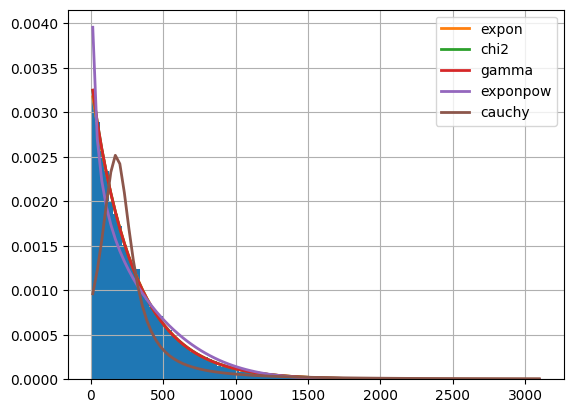

In [48]:
tempos_servico = df["service_length"].values
f = Fitter(tempos_servico, distributions=get_common_distributions())
f.fit()
f.summary()

In [49]:
# Melhor fit para tempos de serviço é exponencial
f.get_best(method = 'sumsquare_error')

{'expon': {'loc': 0.0, 'scale': 299.1025953430804}}

In [50]:
# Exponencial de média 299,1
f.fitted_param["expon"]

(0.0, 299.1025953430804)

In [55]:
df["arrival_time_diff"] = df["call_started"].diff().dt.total_seconds()
# df.loc[df["arrival_time_diff"] < 0] = 
excecoes = df.loc[df["arrival_time_diff"] < 0]
excecoes.to_csv("excecoes.csv")
df.loc[df["arrival_time_diff"] < 0,"arrival_time_diff"] = 0
df = df.fillna(value=0)
df

call_id       date  daily_caller        call_started call_answered  \
0            1 2021-01-01             1 1900-01-01 08:00:00    8:00:00 AM   
1            2 2021-01-01             2 1900-01-01 08:02:42    8:02:42 AM   
2            3 2021-01-01             3 1900-01-01 08:08:24    8:08:24 AM   
3            4 2021-01-01             4 1900-01-01 08:09:37    8:09:37 AM   
4            5 2021-01-01             5 1900-01-01 08:11:10    8:11:10 AM   
...        ...        ...           ...                 ...           ...   
51703    51704 2021-12-31           267 1900-01-01 17:50:10    5:50:10 PM   
51704    51705 2021-12-31           268 1900-01-01 17:50:31    5:50:31 PM   
51705    51706 2021-12-31           269 1900-01-01 17:51:29    5:51:29 PM   
51706    51707 2021-12-31           270 1900-01-01 17:53:10    5:54:26 PM   
51707    51708 2021-12-31           274 1900-01-01 17:58:15    5:58:15 PM   

       call_ended  wait_length  service_length  meets_standard  call_type  \
0      8:14:22 AM            0             863            True          1   
1      8:07:31 AM            0             289            True          0   
2      8:10:13 AM            0             108            True          1   
3      8:13:45 AM            0             247            True          1   
4      8:15:28 AM            0             258            True          1   
...           ...          ...             ...             ...        ...   
51703  5:57:26 PM            0             436            True          0   
51704  5:54:55 PM            0             265            True          0   
51705  5:54:26 PM            0             177            True          1   
51706  5:57:50 PM           76             204           False          2   
51707  5:58:19 PM            0               4            True          0   

       arrival_time_diff  
0                    0.0  
1                  162.0  
2                  342.0  
3                   73.0  
4                   93.0  
...                  ...  
51703              160.0  
51704               21.0  
51705               58.0  
51706              101.0  
51707              305.0  

[51708 rows x 11 columns]

In [64]:
hist_arrival = px.histogram(df,x = "arrival_time_diff")
hist_arrival.show()

chegada_medio = df.groupby(["date"])["arrival_time_diff"].mean()
print(chegada_medio)
chegada_soma = df.groupby(["date"])["arrival_time_diff"].sum()
print(chegada_soma)

arrival_ts_mean = px.line(chegada_medio)

arrival_ts_mean.show()

arrival_ts_total = px.line(chegada_soma)

arrival_ts_total.show()

date
2021-01-01    244.273973
2021-01-04    264.740741
2021-01-05    251.098592
2021-01-06    238.033333
2021-01-07    263.360902
                 ...    
2021-12-27    137.519231
2021-12-28    128.737410
2021-12-29    127.618705
2021-12-30    124.992958
2021-12-31    132.453875
Name: arrival_time_diff, Length: 261, dtype: float64
date
2021-01-01    35664.0
2021-01-04    35740.0
2021-01-05    35656.0
2021-01-06    35705.0
2021-01-07    35027.0
               ...   
2021-12-27    35755.0
2021-12-28    35789.0
2021-12-29    35478.0
2021-12-30    35498.0
2021-12-31    35895.0
Name: arrival_time_diff, Length: 261, dtype: float64
